In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression

In [100]:
df = pd.read_csv("hiring.csv")

In [101]:
df['experience'].fillna(df['experience'].mode()[0], inplace=True)
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)

C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_3744\2264582860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience'].fillna(df['experience'].mode()[0], inplace=True)
C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_3744\2264582860.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [102]:
experience = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11,
}

df['experience_numeric'] = df['experience'].map(experience)

In [103]:
df = df.drop("experience", axis = 'columns')
df

,test_score(out of 10),interview_score(out of 10),salary($),experience_numeric
0,8.0,9,50000,11
1,8.0,6,45000,11
2,6.0,7,60000,5
3,10.0,10,65000,2
4,9.0,6,70000,7
5,7.0,10,62000,3
6,8.0,7,72000,10
7,7.0,8,80000,11


In [104]:
df.rename(columns={'salary($)': 'salary'}, inplace=True)


In [105]:
df

,test_score(out of 10),interview_score(out of 10),salary,experience_numeric
0,8.0,9,50000,11
1,8.0,6,45000,11
2,6.0,7,60000,5
3,10.0,10,65000,2
4,9.0,6,70000,7
5,7.0,10,62000,3
6,8.0,7,72000,10
7,7.0,8,80000,11


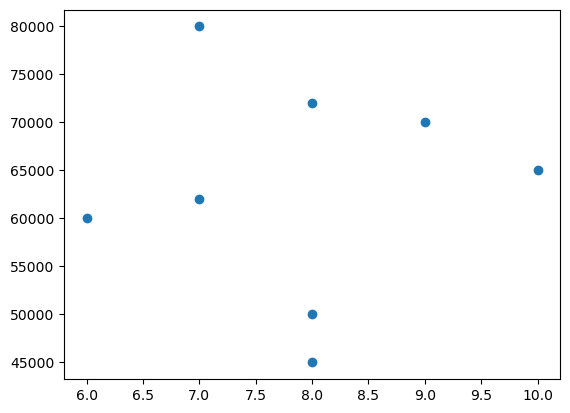

In [106]:
plt.scatter(df['test_score(out of 10)'],df['salary'])


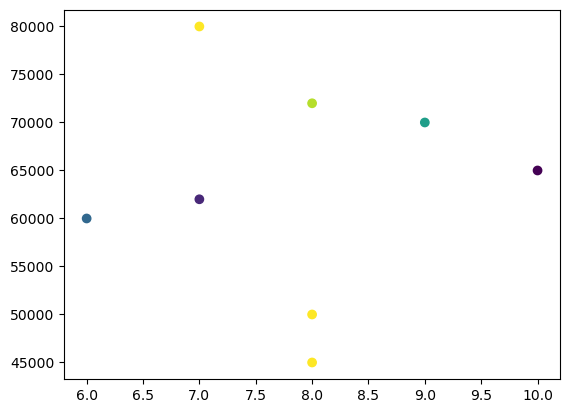

In [107]:
plt.scatter(df['test_score(out of 10)'],df['salary'],c=df['experience_numeric'])


In [108]:
X = df.drop("salary", axis=1)
y = df['salary']

In [109]:
X

,test_score(out of 10),interview_score(out of 10),experience_numeric
0,8.0,9,11
1,8.0,6,11
2,6.0,7,5
3,10.0,10,2
4,9.0,6,7
5,7.0,10,3
6,8.0,7,10
7,7.0,8,11


In [110]:
y.shape
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
train_test_split(X,y,test_size=0.2)

[   test_score(out of 10)  interview_score(out of 10)  experience_numeric
 4                    9.0                           6                   7
 7                    7.0                           8                  11
 3                   10.0                          10                   2
 5                    7.0                          10                   3
 1                    8.0                           6                  11
 6                    8.0                           7                  10,
    test_score(out of 10)  interview_score(out of 10)  experience_numeric
 2                    6.0                           7                   5
 0                    8.0                           9                  11,
 4    70000
 7    80000
 3    65000
 5    62000
 1    45000
 6    72000
 Name: salary, dtype: int64,
 2    60000
 0    50000
 Name: salary, dtype: int64]

In [112]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [113]:
X_train


,test_score(out of 10),interview_score(out of 10),experience_numeric
0,8.0,9,11
4,9.0,6,7
1,8.0,6,11
3,10.0,10,2
2,6.0,7,5
5,7.0,10,3


In [114]:
y_train

0    50000
4    70000
1    45000
3    65000
2    60000
5    62000
Name: salary, dtype: int64

In [115]:
X_test

,test_score(out of 10),interview_score(out of 10),experience_numeric
7,7.0,8,11
6,8.0,7,10


In [116]:
from sklearn.preprocessing import StandardScaler


In [117]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.        ,  0.57735027,  1.26857066],
       [ 0.77459667, -1.15470054,  0.1409523 ],
       [ 0.        , -1.15470054,  1.26857066],
       [ 1.54919334,  1.15470054, -1.26857066],
       [-1.54919334, -0.57735027, -0.42285689],
       [-0.77459667,  1.15470054, -0.98666607]])

In [118]:
X_test = scaler.transform(X_test)
X_test

array([[-0.77459667,  0.        ,  1.26857066],
       [ 0.        , -0.57735027,  0.98666607]])

In [119]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [120]:
clf.fit(X_train,y_train)

LogisticRegression()

In [121]:
y_pred = clf.predict(X_test)


In [122]:
y_test

7    80000
6    72000
Name: salary, dtype: int64

In [123]:
from sklearn.metrics import accuracy_score


In [124]:
accuracy_score(y_test,y_pred)


0.0

ValueError: Filler values must be provided when X has more than 2 training features.

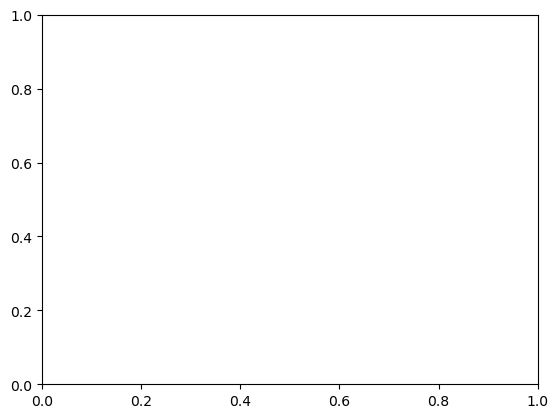

In [125]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)